In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import tensorflow as tf
from datetime import datetime
import math
from tensorflow.keras.layers import Dense, Activation, Dropout, Input, LSTM, Reshape, Lambda, RepeatVector, TimeDistributed
from tensorflow.keras.models import Model, Sequential
from tensorflow.keras.optimizers import Adam
from functions import feature_extraction
import warnings
# from pandas.core.common import SettingWithCopyWarning

# warnings.simplefilter(action="ignore", category=SettingWithCopyWarning)


2023-06-05 16:07:47.985758: I tensorflow/core/platform/cpu_feature_guard.cc:193] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  SSE4.1 SSE4.2 AVX AVX2 FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.


In [2]:
AEP = pd.read_csv('AEP_hourly.csv')
AEP = AEP.rename(columns={'AEP_MW': 'Load'})
features, data = feature_extraction(AEP, diff_in_hour=1, num_days_ago=21, num_hours_forecasting=24,  test_split = 0.1, validation_split = 0.2)

/Users/eliorsegev/Library/Mobile Documents/com~apple~CloudDocs/Studying/Uni/Master/papers/ps_ctrl/functions.py:58: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df[f'{i * diff_in_hour}_hrs_ago'] = df['Load'].shift(i)
/Users/eliorsegev/Library/Mobile Documents/com~apple~CloudDocs/Studying/Uni/Master/papers/ps_ctrl/functions.py:58: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df[f'{i * diff_in_hour}_hrs_ago'] = df['Load'].shift(i)
/Users/eliorsegev/Library/Mobile Documents/com~apple~CloudDocs/Studying/Uni/Master/papers/ps_ctrl/fu

/Users/eliorsegev/Library/Mobile Documents/com~apple~CloudDocs/Studying/Uni/Master/papers/ps_ctrl/functions.py:58: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df[f'{i * diff_in_hour}_hrs_ago'] = df['Load'].shift(i)
/Users/eliorsegev/Library/Mobile Documents/com~apple~CloudDocs/Studying/Uni/Master/papers/ps_ctrl/functions.py:58: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df[f'{i * diff_in_hour}_hrs_ago'] = df['Load'].shift(i)
/Users/eliorsegev/Library/Mobile Documents/com~apple~CloudDocs/Studying/Uni/Master/papers/ps_ctrl/fu

/Users/eliorsegev/Library/Mobile Documents/com~apple~CloudDocs/Studying/Uni/Master/papers/ps_ctrl/functions.py:58: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df[f'{i * diff_in_hour}_hrs_ago'] = df['Load'].shift(i)
/Users/eliorsegev/Library/Mobile Documents/com~apple~CloudDocs/Studying/Uni/Master/papers/ps_ctrl/functions.py:58: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df[f'{i * diff_in_hour}_hrs_ago'] = df['Load'].shift(i)
/Users/eliorsegev/Library/Mobile Documents/com~apple~CloudDocs/Studying/Uni/Master/papers/ps_ctrl/fu

/Users/eliorsegev/Library/Mobile Documents/com~apple~CloudDocs/Studying/Uni/Master/papers/ps_ctrl/functions.py:58: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df[f'{i * diff_in_hour}_hrs_ago'] = df['Load'].shift(i)
/Users/eliorsegev/Library/Mobile Documents/com~apple~CloudDocs/Studying/Uni/Master/papers/ps_ctrl/functions.py:58: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df[f'{i * diff_in_hour}_hrs_ago'] = df['Load'].shift(i)
/Users/eliorsegev/Library/Mobile Documents/com~apple~CloudDocs/Studying/Uni/Master/papers/ps_ctrl/fu

/Users/eliorsegev/Library/Mobile Documents/com~apple~CloudDocs/Studying/Uni/Master/papers/ps_ctrl/functions.py:58: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df[f'{i * diff_in_hour}_hrs_ago'] = df['Load'].shift(i)
/Users/eliorsegev/Library/Mobile Documents/com~apple~CloudDocs/Studying/Uni/Master/papers/ps_ctrl/functions.py:58: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df[f'{i * diff_in_hour}_hrs_ago'] = df['Load'].shift(i)
/Users/eliorsegev/Library/Mobile Documents/com~apple~CloudDocs/Studying/Uni/Master/papers/ps_ctrl/fu

In [3]:
x_train = np.concatenate((data['x_train_seq'],data['x_train_dt']), axis=1)
y_train = data['y_train']
x_val = np.concatenate((data['x_val_seq'],data['x_val_dt']), axis=1)
y_val = data['y_val']
x_test = np.concatenate((data['x_test_seq'],data['x_test_dt']), axis=1)
y_test = data['y_test']

This is a NN model:

In [22]:
512/(2**3)

64.0

In [24]:
input_layer = Input(shape=(x_train.shape[1]))

dense = Dense(512, activation='relu')(input_layer)
layers = [int(512/2**(i)) for i in range(1,4)]

for l in layers:
    dense = Dense(l, activation='relu')(dense)
    
output_layer = Dense(24)(dense)

model_NN = Model(inputs = input_layer, outputs= output_layer)

model_NN.compile(optimizer='adam', loss='mse', metrics=['mae'])
# model_NN.summary()
history_NN = model_NN.fit(x_train, y_train, epochs=7, validation_data=(x_val,y_val))

Epoch 1/7
2638/2638 [==============================] - 8s 3ms/step - loss: 2.2288 - mae: 0.7121 - val_loss: 0.5417 - val_mae: 0.5741
Epoch 2/7
2638/2638 [==============================] - 8s 3ms/step - loss: 0.4831 - mae: 0.5438 - val_loss: 0.4396 - val_mae: 0.5183
Epoch 3/7
2638/2638 [==============================] - 8s 3ms/step - loss: 0.3852 - mae: 0.4848 - val_loss: 0.3492 - val_mae: 0.4582
Epoch 4/7
2638/2638 [==============================] - 9s 3ms/step - loss: 0.3686 - mae: 0.4736 - val_loss: 0.3551 - val_mae: 0.4628
Epoch 5/7
2638/2638 [==============================] - 9s 3ms/step - loss: 0.3602 - mae: 0.4678 - val_loss: 0.3622 - val_mae: 0.4646
Epoch 6/7
2638/2638 [==============================] - 9s 3ms/step - loss: 0.3177 - mae: 0.4367 - val_loss: 0.1876 - val_mae: 0.3374
Epoch 7/7
2638/2638 [==============================] - 10s 4ms/step - loss: 0.1422 - mae: 0.2898 - val_loss: 0.1205 - val_mae: 0.2547


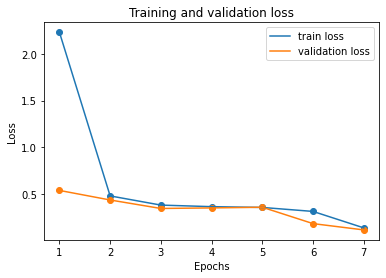

In [25]:
plt.plot(range(1,len(history_NN.history['loss'])+1),history_NN.history['loss'], label='train loss')
plt.plot(range(1,len(history_NN.history['val_loss'])+1), history_NN.history['val_loss'], label='validation loss')
plt.scatter(range(1, len(history_NN.history['loss'])+1),history_NN.history['loss'])
plt.scatter(range(1, len(history_NN.history['val_loss'])+1), history_NN.history['val_loss'])
plt.title('Training and validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

In [26]:
y_hat = np.array(model_NN.predict(x_val))
y_hat = y_hat*data['std_value_load'] + data['mean_value_load']
y = y_val*data['std_value_load'] + data['mean_value_load']

758/758 [==============================] - 1s 1ms/step


y mean: 14972.633888201746, y std: 2619.4099632823054
y_hat mean: 14990.8359375, y_hat std: 2432.801025390625


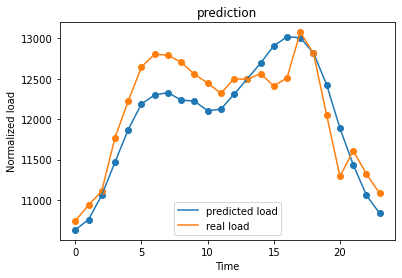

In [28]:
index = 2500

print(f'y mean: {y.mean()}, y std: {y.std()}')
print(f'y_hat mean: {y_hat.mean()}, y_hat std: {y_hat.std()}')

y_plot_hat = y_hat[index,:]
y_plot = y[index,:]

plt.plot(range(len(y_plot_hat)), y_plot_hat, label='predicted load')
plt.plot(range(len(y_plot)), y_plot, label='real load')
plt.scatter(range(len(y_plot_hat)), y_plot_hat)
plt.scatter(range(len(y_plot)), y_plot)
plt.title('prediction')
plt.xlabel('Time')
plt.ylabel('Normalized load')
plt.legend()
plt.show()